In [1]:
%load_ext watermark
%watermark -u -d -p numpy,pandas,matplotlib,sklearn

last updated: 2020-02-13 

numpy 1.18.1
pandas 0.25.3
matplotlib 3.1.1
sklearn 0.0


In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target
print('레이블', np.unique(y))



레이블 [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1, stratify=y)



In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))

In [5]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))


y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [6]:
# 퍼셉트론
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
# eta0 학습률 tol 허용오차
ppn.fit(x_train_std, y_train)
# 정확도 계산하기
y_pred = ppn.predict(x_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

잘못 분류된 샘플 개수: 1
0.9777777777777777


In [7]:
#시각화
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], 
                    y=x[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]

        plt.scatter(x_test[:, 0],
                    x_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')




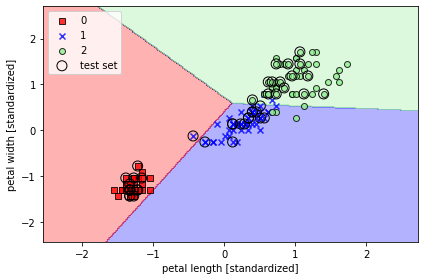

In [8]:


plot_decision_regions(x=x_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

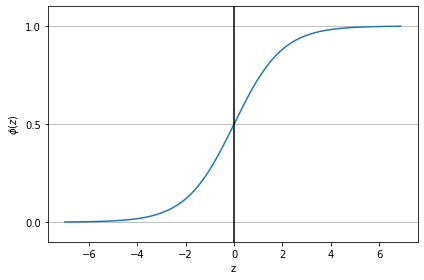

In [9]:
# 로지스틱회귀
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

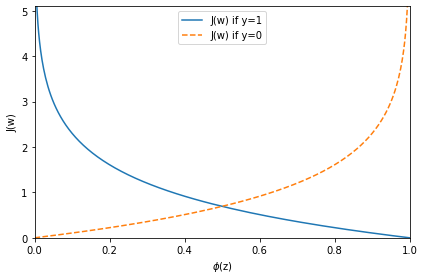

In [10]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression
#C 구제값
lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100.0, random_state=1)
lr.fit(x_train_std, y_train)

lr.predict_proba(x_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

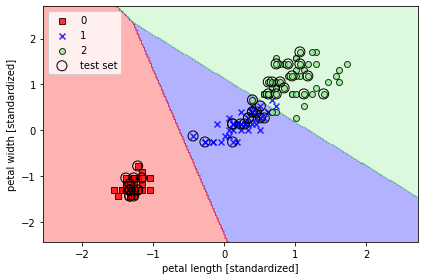

In [12]:
plot_decision_regions(x_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

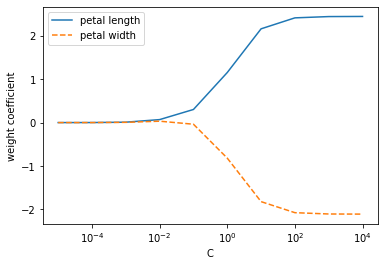

In [13]:
# 규제(C값)을 통한 과대적합피하기
#C가 커질수록 규제 약해짐(과대적합)
#C가 작아지니 0으로 수렴
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

In [14]:
# 서포트벡터머신
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(x_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

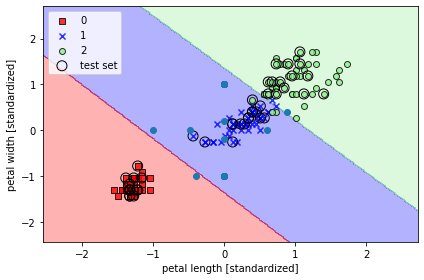

In [15]:
plot_decision_regions(x_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0, :], svm.dual_coef_[1, :])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
y_pred = svm.predict(x_test_std)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.9777777777777777


In [17]:
#클래스별 계수값
svm.coef_

array([[-1.28108835, -1.08908074],
       [-0.68216416, -0.56900015],
       [-2.20580665, -1.9370517 ]])

In [18]:
#지속학습(확률적 경사 하강)
from sklearn.linear_model import SGDClassifier
ppn2 = SGDClassifier(loss='perceptron')
lr2 = SGDClassifier(loss='log')
svm2 = SGDClassifier(loss='hinge')

ppn2.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

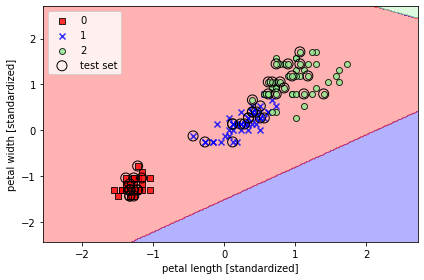

In [19]:
plot_decision_regions(x=x_combined_std, y=y_combined,
                      classifier=ppn2, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

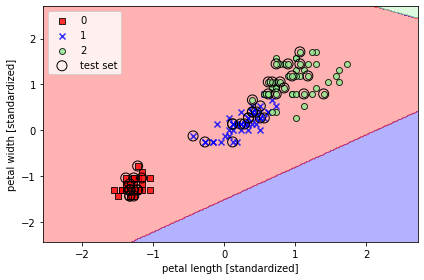

In [20]:
plot_decision_regions(x=x_combined_std, y=y_combined,
                      classifier=ppn2, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 비선형 문제
#비선형데이터 준비하기

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0,
                       x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(x_xor[y_xor == 1, 0],
            x_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(x_xor[y_xor == -1, 0],
            x_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
# gamma: 데이터의 영향력 
# C: cost
svm.fit(x_train_std, y_train)
svm.fit(x_xor, y_xor)
plot_decision_regions(x_xor, y_xor,
                      classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'x_xor' is not defined

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0,:], svm.dual_coef_[1,:])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 결정트리
import matplotlib.pyplot as plt
import numpy as np
#data의 혼잡도
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(x_train, y_train)


In [ ]:
plot_decision_regions(x_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
#import pydotplus
#from pydotplus import graph_from_dot_data
#from sklearn.tree import export_graphviz

#dot_data = export_graphviz(tree,
#                           filled=True, 
#                           rounded=True,
#                           class_names=['Setosa', 
#                                        'Versicolor',
#                                        'Virginica'],
#                           feature_names=['petal length', 
#                                          'petal width'],
#                           out_file=None) 
#graph = graph_from_dot_data(dot_data) 
#graph.write_png('tree.png')

In [ ]:
# 랜덤 포레스트 의사결정나무간의 다수결
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
# n_job 사용할 CPU코어갯수 -1은 최대
forest.fit(x_train, y_train)

In [ ]:
plot_decision_regions(x_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# K-최근접 이웃: 게으른 학습 알고리즘
#다수결의 원리 minkowiski: 거리 구하는 알고리즘의 종류
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train_std, y_train)


In [ ]:
plot_decision_regions(x_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''



df = pd.read_csv(StringIO(csv_data))
df

In [ ]:
df.isnull().sum()

In [ ]:
df.values

In [ ]:
# pandas datafram에서 누락된 값을 평균값으로 대체하기
from sklearn.impute import SimpleImputer

simr = SimpleImputer(missing_values=np.nan, strategy='mean')
simr = simr.fit(df.values)
imputed_data = simr.transform(df.values)
imputed_data

In [ ]:
df.fillna( df.mean(),axis=0 )

In [ ]:
from sklearn.preprocessing import FunctionTransformer
ftr_simr = FunctionTransformer(lambda X: simr.fit_transform(X.T).T, validate=False)
imputed_data2 = ftr_simr.fit_transform(df.values)
imputed_data2

In [ ]:
# 범주형데이터 다루기
import pandas as pd 
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

In [ ]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

In [ ]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

In [ ]:
# 클레스 레이블 인코딩
import numpy as np

# 문자열 클래스 레이블을 정수로 변환하기 위해
# 매핑 딕셔너리를 만듭니다.
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

In [ ]:
# 문자열 클래스 레이블을 정수로 변환합니다.
df['classlabel'] = df['classlabel'].map(class_mapping)
df

In [ ]:
# 클래스 레이블 매핑을 거꾸로 수행합니다.
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 사이킷런의 LabelEncoder를 사용하여 레이블을 인코딩합니다.
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

In [ ]:
# 거꾸로 매핑합니다.
class_le.inverse_transform(y)

In [ ]:
# 순서가 없는 데이터에 원-핫 인코딩 사용하기
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=np.int)
col_trans = ColumnTransformer([('ord_enc', ord_enc, ['color'])])
X_trans = col_trans.fit_transform(df)
X_trans

In [ ]:
col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder(categories='auto')
col_trans = ColumnTransformer([('oh_enc', oh_enc, [0])], remainder='passthrough')
col_trans.fit_transform(X)

In [ ]:
# 판다스의 원-핫 인코딩

pd.get_dummies(df[['price', 'color', 'size']])

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']],columns=['size'])

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']],columns=['price'])

In [ ]:
# 데이터셋을 훈련세트와 테스트세트로 나누기
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신 러닝 저장소에서 Wine 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요.

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('클래스 레이블', np.unique(df_wine['Class label']))
df_wine.head()

In [ ]:
from sklearn.model_selection import train_test_split

xw, yw = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

xw_train, xw_test, yw_train, yw_test =\
    train_test_split(xw, yw, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=yw)

In [ ]:

ex = np.array([0, 1, 2, 3, 4, 5])

print('표준화:', (ex - ex.mean()) / ex.std())

# 판다스는 기본적으로 ddof=1(샘플 표준 편차)을 사용합니다.
# 넘파이의 std 메서드와 사이킷런의 StandardScaler는 ddof=0(모집단 표준 편차)를 사용합니다.

print('정규화:', (ex - ex.min()) / (ex.max() - ex.min()))

In [ ]:
# 특성 스케일 맞추기
# MinMaxScaler 정규화
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
xw_train_norm = mms.fit_transform(xw_train)
xw_test_norm = mms.fit_transform(xw_test) #=>분석에 활용

In [ ]:
# 특성 스케일 맞추기
# StandardScaler 표준화
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
xw_train_std = stdsc.fit_transform(xw_train)
xw_test_std = stdsc.fit_transform(xw_test) #=>분석에 활용

In [ ]:
# 순차특성 알고리즘
from sklearn.linear_model import LogisticRegression
LogisticRegression(solver = 'liblinear', penalty='l1')



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', 
                        penalty='l1', C=1.0, random_state=42)
# C=1.0이 기본값입니다. 값을 증가시키거나 줄여서 
# 규제 효과를 크게 또는 약하게 할 수 있습니다.
lr.fit(xw_train_std, yw_train)
print('훈련 정확도:', lr.score(xw_train_std, yw_train))
print('테스트 정확도:', lr.score(xw_test_std, yw_test))

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear', multi_class='auto',
                            penalty='l1', C=10.**c, random_state=0)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [ ]:
# 순차특성알고리즘
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 특성을 선택합니다.
sbs = SBS(knn, k_features=1)
sbs.fit(xw_train_std, yw_train)

# 특성 조합의 성능 그래프를 출력합니다.
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:

k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

In [ ]:
knn.fit(xw_train_std, yw_train)
print('훈련 정확도:', knn.score(xw_train_std, yw_train))
print('테스트 정확도:', knn.score(xw_test_std, yw_test))

In [ ]:
knn.fit(xw_train_std[:, k3], yw_train)
print('훈련 정확도:', knn.score(xw_train_std[:, k3], yw_train))
print('테스트 정확도:', knn.score(xw_test_std[:, k3], yw_test))

In [ ]:
#랜덤 포레스트의 특성 중요도 사용하기
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(xw_train, yw_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(xw_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(xw_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(xw_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, xw_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
xw_selected = sfm.transform(xw_train)
print('이 임계 조건을 만족하는 샘플의 수:', xw_selected.shape[1])

In [ ]:
for f in range(xw_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

In [22]:
#위스콘신 유방암데이터
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# UCI 머신 러닝 저장소에서 유방암 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요.

# df = pd.read_csv('wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
from sklearn.preprocessing import LabelEncoder
xb = df.loc[:, 2:].values
yb = df.loc[:, 1].values
le = LabelEncoder()
yb = le.fit_transform(yb)
le.classes_

array(['B', 'M'], dtype=object)

In [24]:
le.transform(['M', 'B'])

array([1, 0], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split

xb_train, xb_test, yb_train, yb_test = \
    train_test_split(xb, yb, 
                     test_size=0.20,
                     stratify=yb,
                     random_state=1)

In [26]:
# 파이프라인으로 변환기와 추정기 연결하기
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(solver='liblinear', random_state=1))

pipe_lr.fit(xb_train, yb_train)
y_pred = pipe_lr.predict(xb_test)
print('테스트 정확도: %.3f' % pipe_lr.score(xb_test, yb_test))

테스트 정확도: 0.956


In [27]:
# k-겹 교차 검증을 사용한 모델 성능 평가
# 데이터를 나눠서 n번씩 분석해서 검증하기
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(xb_train, yb_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(xb_train[train], yb_train[train])
    score = pipe_lr.score(xb_train[test], yb_train[test])
    scores.append(score)
    print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1,
          np.bincount(yb_train[train]), score))
    
print('\nCV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

폴드:  1, 클래스 분포: [256 153], 정확도: 0.935
폴드:  2, 클래스 분포: [256 153], 정확도: 0.935
폴드:  3, 클래스 분포: [256 153], 정확도: 0.957
폴드:  4, 클래스 분포: [256 153], 정확도: 0.957
폴드:  5, 클래스 분포: [256 153], 정확도: 0.935
폴드:  6, 클래스 분포: [257 153], 정확도: 0.956
폴드:  7, 클래스 분포: [257 153], 정확도: 0.978
폴드:  8, 클래스 분포: [257 153], 정확도: 0.933
폴드:  9, 클래스 분포: [257 153], 정확도: 0.956
폴드: 10, 클래스 분포: [257 153], 정확도: 0.956

CV 정확도: 0.950 +/- 0.014


C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=xb_train,
                         y=yb_train,
                         cv=10,
                         n_jobs=1)
print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도 점수: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV 정확도: 0.950 +/- 0.014


In [29]:
# cross_val
#test set을 하나로 고정하지 않는다
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator=pipe_lr, 
                        X=xb_train, 
                        y=yb_train, 
                        scoring=['accuracy'], 
                        cv=10, 
                        n_jobs=-1,
                        return_train_score=False)
print('CV 정확도 점수: %s' % scores['test_accuracy'])
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), 
                                 np.std(scores['test_accuracy'])))

CV 정확도 점수: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV 정확도: 0.950 +/- 0.014


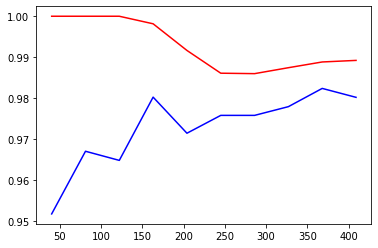

In [30]:
## 학습곡선
# 몇개의 데이터를 사용할 때 최적인가
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(solver='liblinear', 
                                           penalty='l2', 
                                           random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=xb_train,
                               y=yb_train,
                               # linespace(0.1~1.0 10등분)
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, c='r')
plt.plot(train_sizes, test_mean, c='b' )

In [ ]:
#검증곡선
# C값을 조절하는 

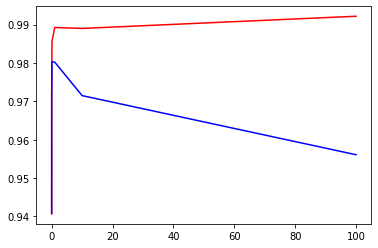

In [31]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=xb_train, 
                y=yb_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, c='r')
plt.plot(param_range, test_mean, c='b' )

In [ ]:
#그리드서치
#관심 있는 매개변수들을 대상으로 
#가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001*10**i for i in range(8)]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(xb_train, yb_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
clf = gs.best_estimator_
clf.fit(xb_train, yb_train)
print('테스트 정확도: %.3f' % clf.score(xb_test, yb_test))

In [ ]:
#중첩교차 
#그리드서치 X cross_val
#gs.best_params_를 사용할 수 없다
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, xb_train, yb_train, 
                         scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, xb_train, yb_train, 
                         scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

In [ ]:
#다른성능평가지표

In [ ]:
# 오차행렬/ confusin_matrix
# 
from sklearn.metrics import confusion_matrix

pipe_svc.fit(xb_train, yb_train)
yb_pred = pipe_svc.predict(xb_test)
confmat = confusion_matrix(y_true=yb_test, y_pred=yb_pred)
print(confmat)
###########true 에측 false 예측
#실제 true
#실제 false

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:
# 분류 모델의 정밀도와 재현율 최적화
# F1 Score : 정밀도와 재현율의 조화 평균
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('정밀도: %.3f' % precision_score(y_true=yb_test, y_pred=yb_pred))
# 양성이라고 예측한 데이터 중 실제 양성인 비율
print('정확도: %.3f' % accuracy_score(y_true=yb_test, y_pred=yb_pred))
print('재현율: %.3f' % recall_score(y_true=yb_test, y_pred=yb_pred))
# 진짜 양성인 데이터 중 양성이라고 예측한 비율
print('F1: %.3f' % f1_score(y_true=yb_test, y_pred=yb_pred))
#정밀도와 재현율의 조화평균

In [ ]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(xb_train, yb_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
#ROC 곡선 그리기 수신자 판단 특성 곡선
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(solver='liblinear',
                                           penalty='l2', 
                                           random_state=1, 
                                           C=100.0))

xb_train2 = xb_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3, 
                          random_state=1).split(xb_train, yb_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(xb_train2[train],
                         yb_train[train]).predict_proba(xb_train2[test])

    fpr, tpr, thresholds = roc_curve(yb_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(solver='liblinear',
                                           penalty='l2', 
                                           random_state=1, 
                                           C=100.0))

xb_train2 = xb_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3, 
                          random_state=1).split(xb_train, yb_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(xb_train2[train],
                         yb_train[train]).predict_proba(xb_train2[test])

    fpr, tpr, thresholds = roc_curve(yb_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
# 회귀분석
#Housingdata가져오기
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

In [ ]:
# 시각화 모듈 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df[cols].corr(), annot=True)
plt.tight_layout()

In [ ]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [ ]:
raise Exception

In [ ]:
#다중분류의 성능지표
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')

In [ ]:
# 불균형한 클래스 다루기 

In [ ]:

X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [ ]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

In [ ]:
from sklearn.utils import resample

print('샘플링하기 전의 클래스 1의 샘플 개수:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('샘플링한 후의 클래스 1의 샘플 개수:', X_upsampled.shape[0])

In [ ]:

X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [ ]:
:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100